# Large datasets

In [1]:
import numpyro
from bayes_window import models, fake_spikes_explore, BayesWindow
from bayes_window.generative_models import generate_fake_spikes
import numpy as np
from importlib import reload


In [2]:

df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=20,
                                                                n_neurons=6,
                                                                n_mice=3,
                                                                dur=5,
                                                               mouse_response_slope=40,
                                                               overall_stim_response_strength=45)

## NUTS student

In [14]:

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              dist_y='student',
              use_gpu=True,
              num_chains=1,
              num_warmup=500,
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)
bw.facet(column='mouse',width=200,height=200).display()

#bw.explore_models(use_gpu=True)

sample: 100%|██████████| 1500/1500 [58:31<00:00,  2.34s/it, 1023 steps of size 4.77e-03. acc. prob=0.93] 


n(Divergences) = 6


alt.HConcatChart(...)

In [ ]:

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              dist_y='student',
              use_gpu=True,
              num_chains=1,
              num_warmup=500,
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)
bw.facet(column='mouse',width=200,height=200).display()

#bw.explore_models(use_gpu=True)

isi


sample: 100%|██████████| 2000/2000 [32:47<00:00,  1.02it/s, 1023 steps of size 8.79e-03. acc. prob=0.93]  


alt.HConcatChart(...)

## NUTS Lognormal 

In [4]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              use_gpu=True, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 3000/3000 [22:18<00:00,  2.24it/s, 127 steps of size 1.59e-02. acc. prob=0.92]  


n(Divergences) = 8


alt.HConcatChart(...)

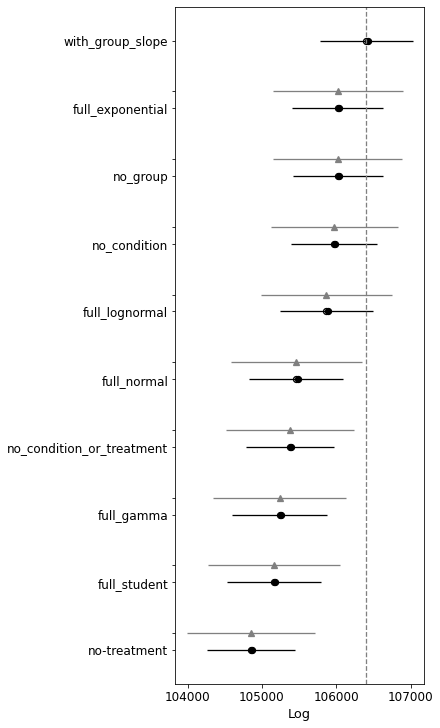

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
with_group_slope,0,106406.167821,19.446190,0.000000,0.208347,624.202119,0.000000,False,log
full_exponential,1,106020.795264,17.439641,385.372557,0.157801,609.833325,872.976414,False,log
no_group,2,106018.938538,16.237840,387.229283,0.140140,606.230451,871.822459,False,log
no_condition,3,105973.782892,13.940908,432.384929,0.138834,581.127539,851.184926,False,log
full_lognormal,4,105865.901517,17.429513,540.266304,0.141266,625.025982,883.306623,False,log
full_normal,5,105460.517759,21.270356,945.650062,0.098556,636.753047,883.169575,False,log
no_condition_or_treatment,6,105377.120328,13.593790,1029.047493,0.033411,590.962365,859.144514,False,log
full_gamma,7,105238.499457,17.823069,1167.668364,0.044120,641.991295,896.421937,False,log
full_student,8,105162.518732,17.897343,1243.649089,0.037524,626.563948,884.272231,False,log
no-treatment,9,104850.877820,14.306689,1555.290001,0.000000,595.870317,864.154643,False,log


In [6]:
bw.explore_models(add_group_slope=True)

## BarkerMH

In [7]:
%%time
from bayes_window import fitting

from importlib import reload
reload(fitting)

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              sampler=numpyro.infer.BarkerMH,
#               progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=5000, num_warmup=3000,
              dist_y='student',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_numpyro,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

alt.HConcatChart(...)

CPU times: user 57 s, sys: 3.39 s, total: 1min
Wall time: 58.9 s


## Fit using SVI

In [4]:
%%time
from bayes_window import fitting
from importlib import reload
reload(fitting)
reload(models)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              n_draws=5000,
              dist_y='gamma',
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

<xarray.Dataset>
Dimensions:                     (b_stim_per_condition_dim_0: 18, b_stim_per_subject_dim_0: 3, chain: 1, draw: 5000)
Coordinates:
  * chain                       (chain) int64 0
  * draw                        (draw) int64 0 1 2 3 4 ... 4996 4997 4998 4999
  * b_stim_per_condition_dim_0  (b_stim_per_condition_dim_0) int64 0 1 ... 16 17
  * b_stim_per_subject_dim_0    (b_stim_per_subject_dim_0) int64 0 1 2
Data variables:
    a                           (chain, draw) float32 -1.098 -1.098 ... -1.098
    b_stim_per_condition        (chain, draw, b_stim_per_condition_dim_0) float32 ...
    b_stim_per_subject          (chain, draw, b_stim_per_subject_dim_0) float32 ...
    sigma_b_condition           (chain, draw) float32 0.1922 0.1922 ... 0.1922
    sigma_b_group               (chain, draw) float32 0.2011 0.2011 ... 0.2011
    sigma_obs                   (chain, draw) float32 1.795 1.795 ... 1.795
Attributes:
    created_at:     2021-04-01T22:33:16.890967
    arviz_version

alt.HConcatChart(...)

CPU times: user 2min 59s, sys: 4.31 s, total: 3min 3s
Wall time: 1min 29s


In [10]:
%%time
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(step_size=0.0005),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,

              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

alt.HConcatChart(...)

CPU times: user 3min 23s, sys: 1.65 s, total: 3min 25s
Wall time: 3min 23s


In [12]:
%%time 
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
#numpyro.enable_validation(False)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              #use_gpu=True,
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(1),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
              #progress_bar=False,
              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

alt.HConcatChart(...)

CPU times: user 2min 21s, sys: 449 ms, total: 2min 21s
Wall time: 2min 21s


Pretty model

In [22]:
reload(models)
bw = BayesWindow(df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.reparam_model(models.model_hierarchical_for_render), do_make_change='subtract',
              progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='normal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True, add_box=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 3000/3000 [00:31<00:00, 94.63it/s, 15 steps of size 2.16e-03. acc. prob=0.84]   


n(Divergences) = 161


alt.HConcatChart(...)

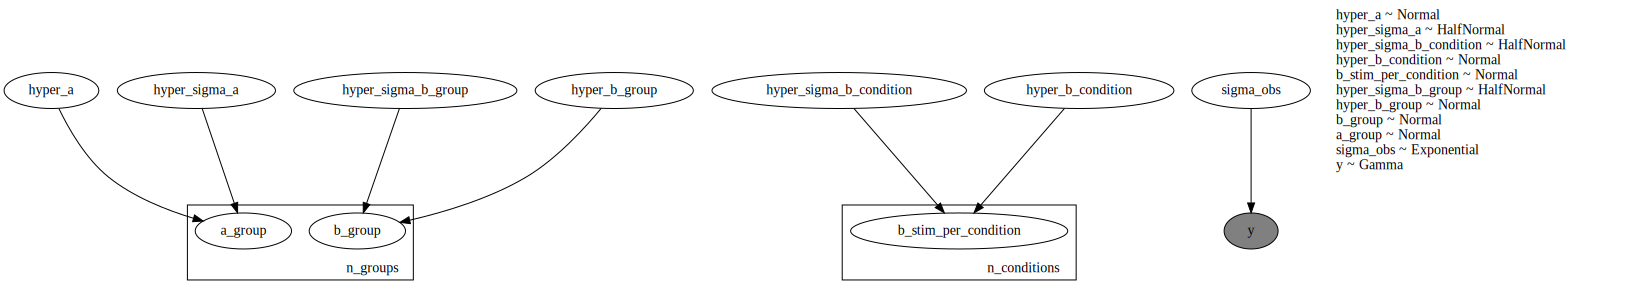

In [15]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    True),
             render_distributions=True)

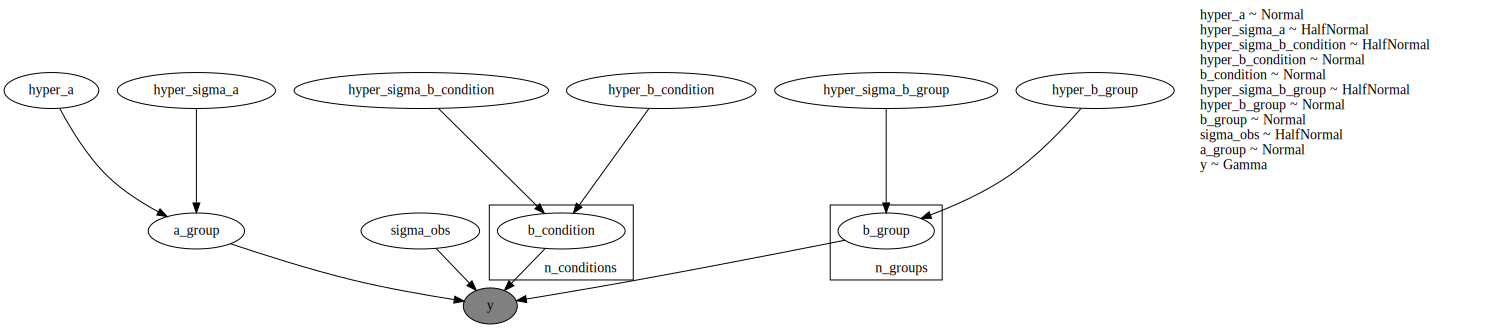

In [83]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    False),
             render_distributions=True)

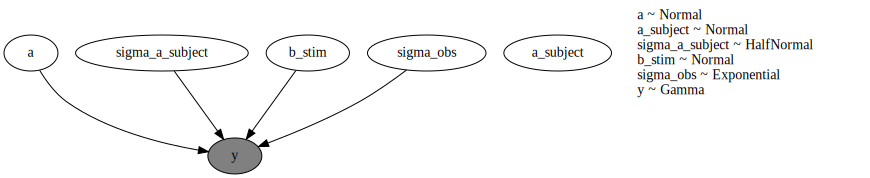

In [78]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hier_stim_one_codition, model_args=(1, 1, 1,  
                                                    'gamma', 
                                                    ),
             render_distributions=True)